In [277]:
%matplotlib inline
import numpy as np
import json
import math
from random import gauss
import matplotlib.pyplot as pyplot
from matplotlib.finance import candlestick_ohlc
from datetime import date

In [150]:
def bs_model(S, T, v, sigma=1, r=0.02):
    return S * math.exp((r - 0.5 * v**2) * T + v * (T ** 0.5) * gauss(0, sigma))

In [298]:
with open('./txf_201409_201410.raw') as f:
    data_rel = [list(map(int, line.strip().split('\t')[1:])) for line in f.readlines()]

In [307]:
def extract_close(data):
    return np.array(data)[:, -1].astype(float)


def extract_ohcl(data):
    return np.array(data)[:, 2:-1].astype(float)


# cal volatility
def volatility(data: 'Single Date'):
    '''
    >>> volatility(data[-1])
    
    1/4 day
    '''
    d = np.array(data)[:, -1].astype(float)
    return ( ( (d[1:] - d[:-1]) / d[:-1]).std() ) / math.sqrt(1*4 / 252)


def gen_k(data, start_price):
    close = extract_close(data)
    #S = close.mean()
    S = start_price
    T = 1 / 252  # 1 min
    v = volatility(data)

    ret = np.empty((len(data) * 4,))
    for i in range(len(data) * 4):
        S = bs_model(S=S, T=T, v=v, r=0.02)
        ret[i] = round(S)
    return ret

def merge_price(d):
    o = d[0]
    c = d[-1]
    h = d.max()
    l = d.min()
    return np.array([o, h, l, c])

([<matplotlib.lines.Line2D at 0x828193940>,
  <matplotlib.patches.Rectangle at 0x8282c6a58>])

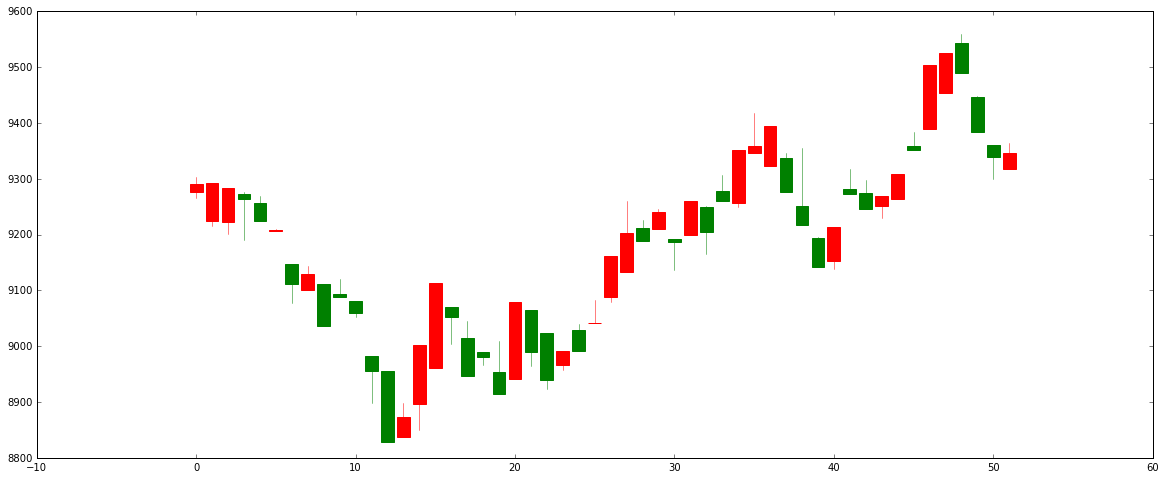

In [366]:
sim_k = gen_k(data_rel, data_rel[0][0])
sim_k = np.array([merge_price(i) for i in sim_k.reshape((sim_k.size // 4, 4))])

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
candlestick_ohlc(ax,
                 np.hstack((np.arange(sim_k.shape[0]).reshape((sim_k.shape[0], 1)), sim_k)), 
                 width=0.8,
                 colorup='r',
                 colordown='green')
candlestick_ohlc(ax,
                 np.hstack((np.arange(sim_k.shape[0]).reshape((sim_k.shape[0], 1)), sim_k)), 
                 width=0.8,
                 colorup='r',
                 colordown='green')

AttributeError: 'list' object has no attribute 'shape'

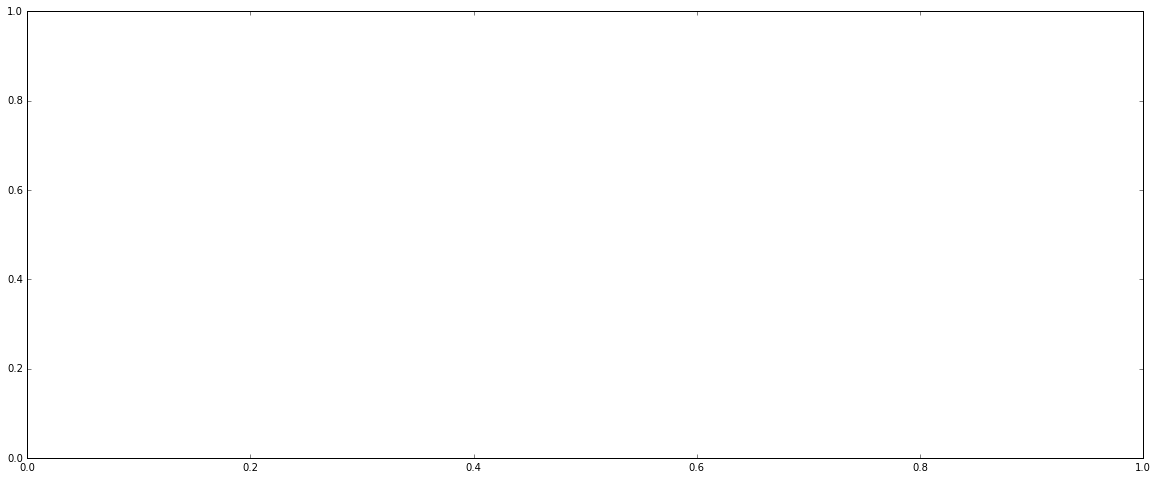

In [367]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
candlestick_ohlc(ax,
                 np.hstack((np.arange(data_rel.shape[0]).reshape((data_rel.shape[0], 1)), data_rel)), 
                 width=0.8,
                 colorup='r',
                 colordown='green')

In [369]:
np.array(data_rel)

array([[9253, 9285, 9244, 9275],
       [9260, 9266, 9200, 9231],
       [9249, 9388, 9247, 9378],
       [9386, 9399, 9365, 9391],
       [9386, 9408, 9375, 9390],
       [9421, 9498, 9420, 9477],
       [9492, 9500, 9469, 9479],
       [9456, 9485, 9432, 9473],
       [9473, 9550, 9470, 9528],
       [9512, 9514, 9388, 9410],
       [9415, 9482, 9399, 9451],
       [9447, 9448, 9380, 9425],
       [9444, 9463, 9370, 9407],
       [9426, 9530, 9425, 9428],
       [9380, 9402, 9310, 9347],
       [9376, 9385, 9300, 9302],
       [9325, 9328, 9229, 9245],
       [9206, 9244, 9172, 9218],
       [9219, 9233, 9141, 9154],
       [9195, 9248, 9148, 9172],
       [9234, 9265, 9213, 9243],
       [9281, 9304, 9240, 9265],
       [9202, 9205, 9100, 9128],
       [9106, 9152, 9102, 9117],
       [9095, 9142, 9081, 9127],
       [9158, 9168, 8995, 9028],
       [8958, 9022, 8937, 8980],
       [8991, 9008, 8943, 8982],
       [8961, 9021, 8871, 8991],
       [8943, 9015, 8911, 8980],
       [89